# What makes a song chart?
## Jacob Cuomo, Dylan Fox, and Ryan Tran, and Colby Luttrell

### Data import and Cleanse

In [1]:
# Import appropriate libraries
import pandas as pd # loading in data
import numpy as np
import matplotlib.pyplot as plt # creating visualizations
import seaborn as sns # also for creating visualizations
import re # filtering out special characters using regex

# for multiple regression model
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Import dataset
spotify = pd.read_csv('spotify_dataset.csv')
spotify.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
# Quickly look over variables in the user file
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [4]:
# Check if there are any missing values?
print("Are there any missing values?:")
print(spotify.isnull().values.any())

Are there any missing values?:
False


In [5]:
# It may seem that there are not any missing values but if you take a closer look...
count = 0

blanks = spotify.loc[spotify['Song ID'] == ' ']
count = len(blanks)
print("There are", count, "missing values.")

#Where are the missing values?
spotify.loc[spotify['Song ID'] == ' ']

There are 11 missing values.


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,...,,,,,,,,,,
163,164,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,,,,...,,,,,,,,,,
464,465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,,,,...,,,,,,,,,,
530,531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,,,,...,,,,,,,,,,
636,637,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,"8,804,531",Chris Rea,,,,...,,,,,,,,,,
654,655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,,,,...,,,,,,,,,,
750,751,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...","5,358,940",Tainy,,,,...,,,,,,,,,,
784,785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",,,,...,,,,,,,,,,
876,877,164,4,2020-09-18--2020-09-25,+Linda,"4,964,708",Dalex,,,,...,,,,,,,,,,
1140,1141,131,1,2020-05-29--2020-06-05,In meinem Benz,"5,494,500","AK AUSSERKONTROLLE, Bonez MC",,,,...,,,,,,,,,,


##### User Visualizations

In [6]:
# Analyze the number of times an artists shows up in the dataset, does being a certain artist increase chances of a popular
# hit song?
spotify['Artist'].value_counts()

Taylor Swift                               52
Lil Uzi Vert                               32
Justin Bieber                              32
Juice WRLD                                 30
Pop Smoke                                  29
                                           ..
StarBoi3                                    1
Powfu, beabadoobee                          1
Dadá Boladão, Tati Zaqui, OIK               1
Crissin, Totoy El Frio, Natan & Shander     1
Fleetwood Mac                               1
Name: Artist, Length: 716, dtype: int64

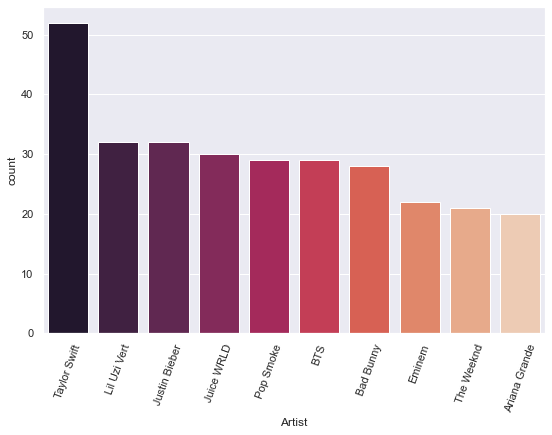

In [7]:
# Create a visualization for the number of songs for each artist
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(9,6)})
sns.countplot(x="Artist", data=spotify, capsize=.1, palette="rocket", 
             order=spotify.Artist.value_counts().iloc[:10].index)

plt.xticks(rotation = 70) # rotate the labels

plt.show()

# CITATION: https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot

In [8]:
# a function that describes the total popularity for each artist, we have to do some feature engineering here to 
# get the data in the proper format. This function will loop through all songs, their artist, and keep track of a total
# popularity variable for each artist
def total_popularity():
    artists = dict() # store artist and their respective popularity in a dictionary
    for i in range(len(spotify)): # loop through all songs
        artist = spotify['Artist'][i]
        artist = re.sub('[^A-Za-z0-9]+', '', artist) # filter artist names
        song_popularity = spotify["Popularity"][i].rstrip() # get song popularity
        try:
            song_popularity = int(song_popularity)            # attempt to convert song popularity to int
            if artists.get(artist) == None:                   # if artist does not exist, create new key in dict
                artists[artist] = int(song_popularity)
            else:                                             # add current song popularity to artists current popularity
                artists[artist] = int(artists.get(artist)) + int(song_popularity)
        except ValueError:
            # Handle the exception
            continue
    
    artists_name = list() # list of artists name
    artists_total_pop = list() # total popularity corresponsd to artist name indices in prev list
    
    for key in artists: # loop through dictinoary
        artists_name.append(key) # add artist to list
        artists_total_pop.append(int(artists[key])) # add artists total pop to list
    
    # remake current dictionary to be able to convert into dataframe easier later on
    artists = {
        "Artist": artists_name,
        "Total Popularity": artists_total_pop
    }
    
    return artists

total_popularity()

{'Artist': ['Mneskin',
  'TheKidLAROI',
  'OliviaRodrigo',
  'EdSheeran',
  'LilNasX',
  'DojaCat',
  'RauwAlejandro',
  'BadBunny',
  'DuaLipa',
  'JBalvinMariaBecerra',
  'BTS',
  'JustinBieber',
  'TheWeeknd',
  'NioGarciaJBalvinBadBunny',
  'MoraBadBunnySech',
  'GlassAnimals',
  'Farruko',
  'PostMalone',
  'RitonNightcrawlers',
  'MaskedWolf',
  'BrunoMarsAndersonPaakSilkSonic',
  'CamilaCabello',
  'SebastianYatraMykeTowers',
  'HarryStyles',
  'PoloG',
  'DojaCatTheWeeknd',
  'SechJhayCortez',
  'BadBunnyJhayCortez',
  'TINIMariaBecerra',
  'JBalvinKAROLGNickyJamCrissinTotoyElFrioNatanShander',
  'Tisto',
  'Galantis',
  '24kGoldn',
  'TiagoPZKLITkillah',
  'WisinJhayCortezAnuelAALosLegendariosMykeTowers',
  'BellaPoarch',
  'BizarrapNickyJam',
  'MarcSeguRauwAlejandroPolGranch',
  'BillieEilish',
  'MajesticBoneyM',
  'Marshmello',
  'SurfCurse',
  'JooGomes',
  'RauwAlejandroMrNaisgai',
  'Maroon5',
  'OneRepublic',
  'MeganTheeStallion',
  'ATBTopicA7S',
  'Giveon',
  'Trini

                          Artist  Total Popularity
248                  TaylorSwift              3558
123                    JuiceWRLD              2210
10                           BTS              2181
7                       BadBunny              2062
11                  JustinBieber              2005
..                           ...               ...
554  BoomdabashAlessandraAmoroso                 0
265        SebastianYatraGuaynaa                 0
260         KAROLGAnuelAAJBalvin                 0
208                       KAROLG                 0
393                 StevieWonder                 0

[712 rows x 2 columns]


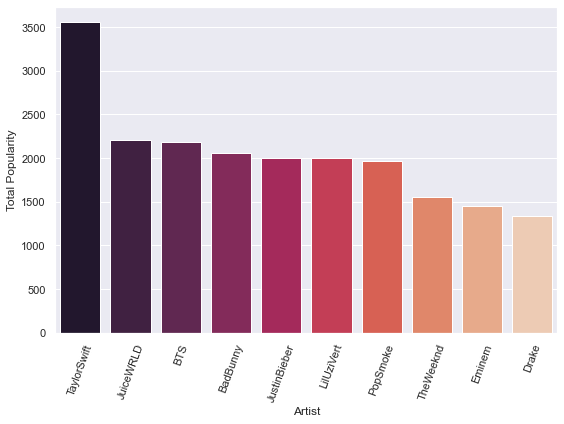

In [9]:
# Create a visualization for the total popularity for each artist
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(9,6)})
dictionary = total_popularity()
spotify_pop = pd.DataFrame(dictionary)
spotify_pop.sort_values(by=['Total Popularity'], ascending=False, inplace=True)
print(spotify_pop)

sns.barplot(x="Artist", y="Total Popularity", data=spotify_pop[:10], palette="rocket")

plt.xticks(rotation = 70) # rotate the labels

plt.show()

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html

In [10]:
# a function that describes the total stream count for each artist, we have to do some feature engineering here to 
# get the data in the proper format. This function will loop through all songs, their artist, and keep track of a total
# stream count variable for each artist
def total_streams():
    artists = dict() # store artist and their respective total streams in a dictionary
    for i in range(len(spotify)): # loop through all songs
        artist = spotify['Artist'][i]
        artist = re.sub('[^A-Za-z0-9]+', '', artist) # filter artist names
        song_streams = spotify['Streams'][i].rstrip().replace(",", "") # get song stream count
        try:
            song_streams = int(song_streams)            # attempt to convert song stream count to int
            if artists.get(artist) == None:                   # if artist does not exist, create new key in dict
                artists[artist] = int(song_streams)
            else:                                             # add current song stream count to artists current stream count
                artists[artist] = int(artists.get(artist)) + int(song_streams)
        except ValueError:
            # Handle the exception
            continue
    
    artists_name = list() # list of artists name
    artists_total_streams = list() # total stream count corresponsd to artist name indices in prev list
    
    for key in artists: # loop through dictinoary
        artists_name.append(key) # add artist to list
        artists_total_streams.append(int(artists[key])) # add artists total stream count to list

    # remake current dictionary to be able to convert into dataframe easier later on
    artists = {
        "Artist": artists_name,
        "Total Streams": artists_total_streams
    }
    
    return artists

total_streams()

{'Artist': ['Mneskin',
  'TheKidLAROI',
  'OliviaRodrigo',
  'EdSheeran',
  'LilNasX',
  'DojaCat',
  'RauwAlejandro',
  'BadBunny',
  'DuaLipa',
  'JBalvinMariaBecerra',
  'BTS',
  'JustinBieber',
  'TheWeeknd',
  'NioGarciaJBalvinBadBunny',
  'MoraBadBunnySech',
  'GlassAnimals',
  'Farruko',
  'PostMalone',
  'RitonNightcrawlers',
  'MaskedWolf',
  'BrunoMarsAndersonPaakSilkSonic',
  'CamilaCabello',
  'SebastianYatraMykeTowers',
  'HarryStyles',
  'PoloG',
  'DojaCatTheWeeknd',
  'SechJhayCortez',
  'BadBunnyJhayCortez',
  'TINIMariaBecerra',
  'JBalvinKAROLGNickyJamCrissinTotoyElFrioNatanShander',
  'Tisto',
  'Galantis',
  '24kGoldn',
  'TiagoPZKLITkillah',
  'WisinJhayCortezAnuelAALosLegendariosMykeTowers',
  'BellaPoarch',
  'BizarrapNickyJam',
  'MarcSeguRauwAlejandroPolGranch',
  'BillieEilish',
  'MajesticBoneyM',
  'Marshmello',
  'SurfCurse',
  'JooGomes',
  'RauwAlejandroMrNaisgai',
  'Maroon5',
  'OneRepublic',
  'MeganTheeStallion',
  'ATBTopicA7S',
  'Giveon',
  'Trini

                                               Artist  Total Streams
248                                       TaylorSwift      381480455
10                                                BTS      238400020
11                                       JustinBieber      225842427
555                                        LilUziVert      208822039
7                                            BadBunny      203813133
..                                                ...            ...
582                                     BadBunnyTainy        4350496
560                                   BadBunnyDonOmar        4312675
625  LunayMykeTowersOzunaChenchoCorleoneRauwAlejandro        4261965
626                                 PoloGStunna4Vegas        4244510
627                                          SubUrban        4218201

[716 rows x 2 columns]


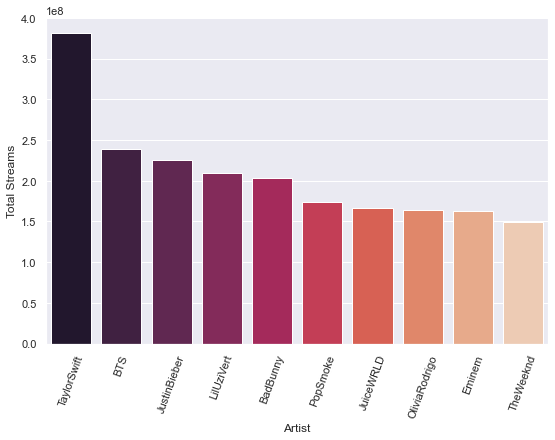

In [11]:
# Create a visualization for the total streams for each artist
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(9,6)})
dictionary = total_streams()
spotify_pop = pd.DataFrame(dictionary)
spotify_pop.sort_values(by=['Total Streams'], ascending=False, inplace=True)
print(spotify_pop)

sns.barplot(x="Artist", y="Total Streams", data=spotify_pop[:10], palette="rocket")

plt.xticks(rotation = 70) # rotate the labels

plt.show()

### CITATION: https://seaborn.pydata.org/generated/seaborn.barplot.html

## Genre Visualizations 

In [12]:
genres = spotify["Genre"]
unique_genres = [None]* 334
count = 0
for i in range(len(genres)):
    genre = genres[i].split(",")
    for j in range(len(genre)):
        if genre[j].replace('[', ' ').replace(']', ' ').replace("'", ' ').strip() not in unique_genres:
            if genre[j].replace('[', ' ').replace(']', ' ').replace("'", ' ').strip() != '':
                unique_genres[count] = genre[j].replace('[', ' ').replace(']', ' ').replace("'", ' ').strip()
                count = count + 1

In [13]:
# Take a look at the genres
print(unique_genres)

['indie rock italiano', 'italian pop', 'australian hip hop', 'pop', 'uk pop', 'lgbtq+ hip hop', 'pop rap', 'dance pop', 'puerto rican pop', 'trap latino', 'latin', 'reggaeton', 'reggaeton colombiano', 'k-pop', 'k-pop boy group', 'canadian pop', 'post-teen pop', 'canadian contemporary r&b', 'gauze pop', 'indietronica', 'shiver pop', 'latin hip hop', 'dfw rap', 'melodic rap', 'rap', 'house', 'pop dance', 'tropical house', 'uk dance', 'electropop', 'colombian pop', 'chicago rap', 'panamanian pop', 'latin pop', 'pop argentino', 'big room', 'brostep', 'dutch edm', 'edm', 'electro house', 'slap house', 'trance', 'cali rap', 'trap argentino', 'argentine hip hop', 'pop venezolano', 'progressive electro house', 'dreamo', 'indie surf', 'surf punk', 'vegas indie', 'pop rock', 'piano rock', 'houston rap', 'trap queen', 'german dance', 'german techno', 'german trance', 'r&b', 'modern alternative rock', 'modern rock', 'canadian hip hop', 'toronto rap', 'brooklyn drill', 'nyc rap', 'aussietronica', '

In [14]:
def substr(string, start, length):
    chars = list(string)
    sub = ""
    if (len(string) - start) >= length:
        for i in range(length):
            sub = sub + str(chars[start + i])
        return sub
    raise Exception("Length of substring is too long")

years =  spotify["Release Date"].copy()
year = [None] * len(years)
for i in range(len(years)):
    year = years[i]
    if year != " ":
        years[i] = substr(year, 0, 4).strip()
    else:
        years[i] = "0"
for i in range(len(years)):
    years[i] = int(years[i])
    
spotify['Release Year'] = years

In [15]:
unique_years = [None] * 46
years = spotify["Release Year"]
count = 0
for i in range(len(years)):
    if years[i] not in unique_years:
        unique_years[count] = years[i]
        count = count + 1
unique_years.sort()

In [16]:
genre_count = [None] * 46
for m in range(len(unique_years)):
    s = spotify.loc[spotify["Release Year"] <= unique_years[m]]
    genres = s["Genre"].tolist()
    unique_genres = [None]* 400
    count = 0
    for i in range(len(genres)):
        if genres[i] != " ":
            genre = genres[i].split(",")
            for j in range(len(genre)):
                if genre[j].replace('[', ' ').replace(']', ' ').replace("'", ' ').strip() not in unique_genres:
                    if genre[j].replace('[', ' ').replace(']', ' ').replace("'", ' ').strip() != '':
                        unique_genres[count] = genre[j].replace('[', ' ').replace(']', ' ').replace("'", ' ').strip()
                        count = count + 1

    unique_genres = list(filter(None, unique_genres))
    genre_count[m] = len(unique_genres)
unique_years
genre_count = genre_count[1:45]
unique_years = unique_years[1:45]

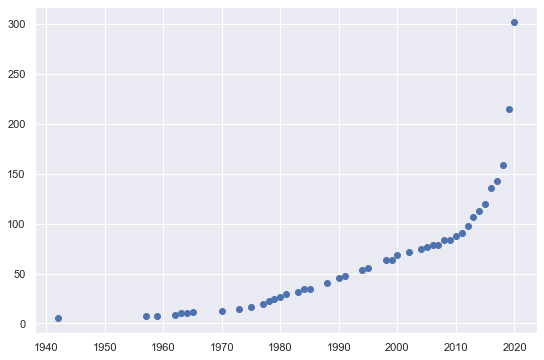

In [17]:
plt.scatter(unique_years, genre_count)

In [18]:
# Seperate into more general genres
pop = spotify[spotify['Genre'].str.contains('pop')]
indie = spotify[spotify['Genre'].str.contains('indie')]
Rap = spotify[spotify['Genre'].str.contains('rap')]
country = spotify[spotify['Genre'].str.contains('country')]
rock = spotify[spotify['Genre'].str.contains('rock')]
rb = spotify[spotify['Genre'].str.contains('r&b')]
folk = spotify[spotify['Genre'].str.contains('folk')]
soul = spotify[spotify['Genre'].str.contains('soul')]
edm = spotify[spotify['Genre'].str.contains('edm')]

In [19]:
print("Pop song count:",pop['Song Name'].count())
print("Indie song count:",indie['Song Name'].count())
print("Rap song count:",Rap['Song Name'].count())
print("Country song count:",country['Song Name'].count())
print("Rock song count:",rock['Song Name'].count())
print("R&B song count:",rb['Song Name'].count())
print("Folk song count:",folk['Song Name'].count())
print("Soul song count:",soul['Song Name'].count())
print("EDM song count:",edm['Song Name'].count())

Pop song count: 819
Indie song count: 38
Rap song count: 654
Country song count: 14
Rock song count: 74
R&B song count: 75
Folk song count: 7
Soul song count: 14
EDM song count: 50


([<matplotlib.patches.Wedge at 0x7fa80031adc0>,
 [Text(0.1202116174877519, 1.2442062397452356, 'Pop'),
  Text(-1.2403677386220968, 0.15488018913181184, 'Indie'),
  Text(-0.5427890833122413, -1.1260017810985277, 'Rap'),
  Text(0.8551916208013143, -0.9116727986022294, 'Country'),
  Text(0.98831413317039, -0.7653333745340396, 'Rock'),
  Text(1.1558159014618197, -0.47601428752507136, 'R&B'),
  Text(1.2132618347575177, -0.30082506597825565, 'Folk'),
  Text(1.2237654566286773, -0.2547510690113089, 'Soul'),
  Text(1.2449390106720366, -0.11236930055371498, 'EDM')],
 [Text(0.10578622338922168, 1.0949014909758072, '47%'),
  Text(-1.0915236099874452, 0.13629456643599444, '2%'),
  Text(-0.4776543933147724, -0.9908815673667045, '37%'),
  Text(0.7525686263051566, -0.8022720627699619, '1%'),
  Text(0.8697164371899433, -0.6734933695899549, '4%'),
  Text(1.0171179932864014, -0.41889257302206284, '4%'),
  Text(1.0676704145866156, -0.264726058060865, '0%'),
  Text(1.0769136018332361, -0.22418094072995184

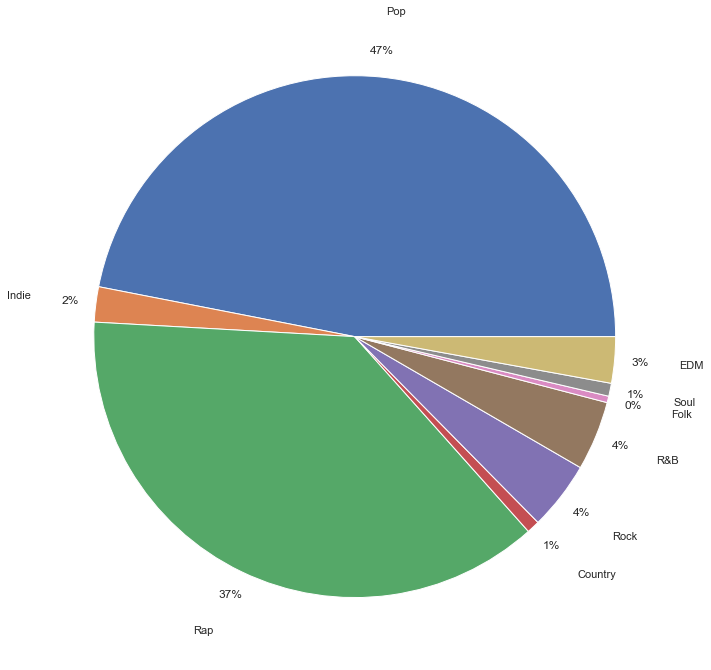

In [20]:
# Creates Pie chart
count_labels = ['Pop','Indie','Rap','Country','Rock','R&B','Folk','Soul','EDM']
count_totals = [819,38,654,14,74,75,7,14,50]
plt.figure(figsize=(12, 12))
plt.pie(count_totals, labels=count_labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.25)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


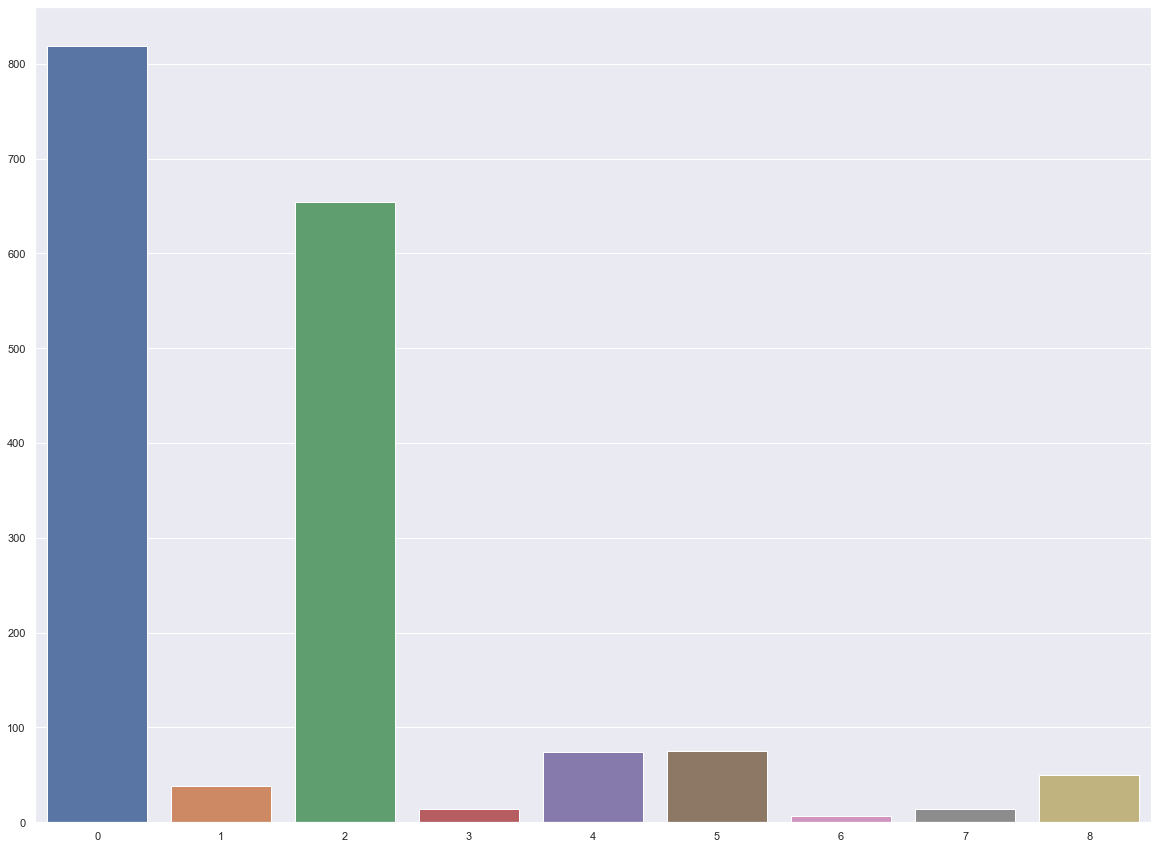

In [21]:
# Creates bar chart
plt.figure(figsize=(20, 15))
y_pos = np.arange(len(count_labels))
c = ['red','blue','green','purple','orange','pink','black','yellow','brown']
sns.barplot(y_pos, count_totals)

plt.show()

In [22]:
#Based on various websites such as https://soundcharts.com/blog/music-streaming-rates-payouts and https://producerhive.com/music-marketing-tips/streaming-royalties-breakdown/
payout = 0.00318
#Strips , in Streams and turns it into a int type. Then finds min to see what is the minimum amount of songs you would need to chart on the Top 200 charts on Spotify.
genre = '"Pop"'
pop = pop.replace(',','', regex=True)
pop['Streams'] = pop['Streams'].astype(int)
popmean = int(pop['Streams'].mean())
poptotal = round(popmean*payout,2)
print("The average amount of streams for the genre",genre,"is",popmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",poptotal,"dollars")
print("")

genre = '"Indie"'
indie = indie.replace(',','', regex=True)
indie['Streams'] = indie['Streams'].astype(int)
indiemean = int(indie['Streams'].mean())
indietotal = round(indiemean*payout,2)
print("The average amount of streams for the genre",genre,"is",indiemean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",indietotal,"dollars")
print("")


genre = '"Rap"'
Rap = Rap.replace(',','', regex=True)
Rap['Streams'] = Rap['Streams'].astype(int)
Rapmean = int(Rap['Streams'].mean())
Raptotal = round(Rapmean*payout,2)
print("The average amount of streams for the genre",genre,"is",Rapmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",Raptotal,"dollars")
print("")

genre = '"Country"'
country = country.replace(',','', regex=True)
country['Streams'] = country['Streams'].astype(int)
countrymean = int(country['Streams'].mean())
countrytotal = round(countrymean*payout,2)
print("The average amount of streams for the genre",genre,"is",countrymean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",countrytotal,"dollars")
print("")


genre = '"Rock"'
rock= rock.replace(',','', regex=True)
rock['Streams'] = rock['Streams'].astype(int)
rockmean = int(rock['Streams'].mean())
rocktotal = round(rockmean*payout,2)
print("The average amount of streams for the genre",genre,"is",rockmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",rocktotal,"dollars")
print("")

genre = '"R&B"'
rb = rb.replace(',','', regex=True)
rb['Streams'] = rb['Streams'].astype(int)
rbmean = int(rb['Streams'].mean())
rbtotal = round(rbmean*payout,2)
print("The average amount of streams for the genre",genre,"is",rbmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",rbtotal,"dollars")
print("")

genre = '"Folk"'
folk = folk.replace(',','', regex=True)
folk['Streams'] = folk['Streams'].astype(int)
folkmean = int(folk['Streams'].mean())
folktotal = round(folkmean*payout,2)
print("The average amount of streams for the genre",genre,"is",folkmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",folktotal,"dollars")
print("")

genre = '"Soul"'
soul = soul.replace(',','', regex=True)
soul['Streams'] = soul['Streams'].astype(int)
soulmean = int(soul['Streams'].mean())
soultotal = round(soulmean*payout,2)
print("The average amount of streams for the genre",genre,"is",soulmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",soultotal,"dollars")
print("")

genre = '"EDM"'
edm = edm.replace(',','', regex=True)
edm['Streams'] = edm['Streams'].astype(int)
edmmean = int(edm['Streams'].mean())
edmtotal = round(edmmean*payout,2)
print("The average amount of streams for the genre",genre,"is",edmmean,"streams.")
print("On average the amount made from a song in",genre,"that charts in the top 200 is",edmtotal,"dollars")

The average amount of streams for the genre "Pop" is 6521754 streams.
On average the amount made from a song in "Pop" that charts in the top 200 is 20739.18 dollars

The average amount of streams for the genre "Indie" is 7166032 streams.
On average the amount made from a song in "Indie" that charts in the top 200 is 22787.98 dollars

The average amount of streams for the genre "Rap" is 6097230 streams.
On average the amount made from a song in "Rap" that charts in the top 200 is 19389.19 dollars

The average amount of streams for the genre "Country" is 5519205 streams.
On average the amount made from a song in "Country" that charts in the top 200 is 17551.07 dollars

The average amount of streams for the genre "Rock" is 7095281 streams.
On average the amount made from a song in "Rock" that charts in the top 200 is 22562.99 dollars

The average amount of streams for the genre "R&B" is 6142933 streams.
On average the amount made from a song in "R&B" that charts in the top 200 is 19534.53

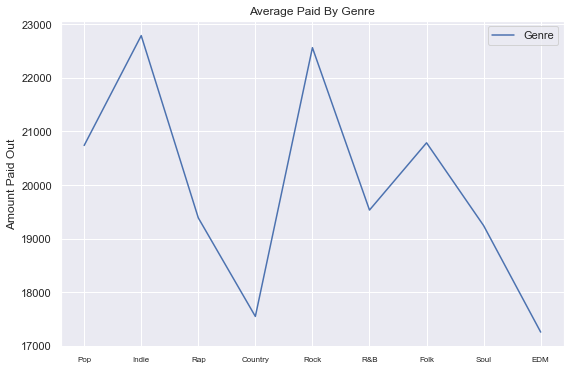

In [23]:
# Creates labels and totals
genres = ['Pop', "Indie",'Rap', 'Country','Rock', 'R&B', 'Folk', 'Soul', 'EDM']
totals = [20739.18, 22787.98, 19389.19, 17551.07, 22562.99, 19534.53, 20788.89, 19244.53, 17258.56]
y_pos = np.arange(len(genres))
    
# Creates a line graph
fig, ax = plt.subplots()
ax.plot(genres, totals, label="Genre")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.ylabel('Amount Paid Out')
plt.title("Average Paid By Genre")
ax.legend()
plt.show()


In [24]:
# Strip commas from streams and turn column into in
spotify = spotify.replace(',','', regex=True)
spotify['Streams'] = spotify['Streams'].astype(int)

In [25]:
spotify[spotify['Streams'] == spotify['Streams'].max()]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,['indie rock italiano' 'italian pop'],...,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,2017


In [26]:
spotify[spotify['Streams']==spotify['Streams'].min()]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year
1250,1251,117,8,2020-02-14--2020-02-21,Good as Hell (feat. Ariana Grande),4176083,Lizzo,3991674,07Oz5StQ7GRoygNLaXs2pd,['dance pop' 'escape room' 'minnesota hip hop'...,...,0.892,-3.001,0.0645,0.298,0.735,95.927,159011,0.478,F,2016


In [27]:
# Print out the highest amount made and lowest amount paid out
highestpaid = round(48633449*payout,2)
lowestpaid = round(4176083*payout,2)
print("The amount that was paid out from the highest streaming song 'Beggin' was",highestpaid)
print("The amount that was paid out from the lowest streaming song 'Good as Hell' was",lowestpaid)

The amount that was paid out from the highest streaming song 'Beggin' was 154654.37
The amount that was paid out from the lowest streaming song 'Good as Hell' was 13279.94
